# Descriptive Statistics

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.optimize import minimize
from scipy.stats import norm



In [65]:
df = pd.read_csv(r'FED-SVENY.csv')
df = df.set_index("Date")


In [66]:
#Getting rid of 1M and 2M because of insufficient data
df_num = df.iloc[:353,2:]
df_num.index = pd.to_datetime(df_num.index)
print(df_num)

            3 MO  6 MO   12 MO   24 MO   36 MO   48 MO   60 MO   72 MO  \
Date                                                                     
2023-03-31  4.80  4.90  4.2418  3.7933  3.5796  3.4714  3.4163  3.3915   
2023-02-28  4.88  5.17  5.1137  4.7729  4.4427  4.2428  4.1261  4.0564   
2023-01-31  4.70  4.80  4.6559  4.2041  3.9040  3.7098  3.5895  3.5206   
2022-12-31  4.42  4.76  4.7029  4.4321  4.2295  4.0825  3.9802  3.9137   
2022-11-30  4.37  4.70  4.6594  4.3488  4.1147  3.9431  3.8221  3.7418   
...          ...   ...     ...     ...     ...     ...     ...     ...   
1994-03-31  3.56  3.92  4.5522  5.2079  5.6556  5.9969  6.2655  6.4781   
1994-02-28  3.47  3.72  4.0995  4.6497  5.0455  5.3560  5.6122  5.8285   
1994-01-31  3.05  3.25  3.5657  4.0662  4.4546  4.7665  5.0243  5.2422   
1993-12-31  3.07  3.30  3.6834  4.2071  4.6124  4.9385  5.2084  5.4362   
1993-11-30  3.21  3.40  3.6706  4.1769  4.5825  4.9141  5.1894  5.4210   

             84 MO   96 MO  108 MO  1

In [67]:
#Missing data
df_num.isna().sum()

3 MO      0
6 MO      0
12 MO     0
24 MO     0
36 MO     0
48 MO     0
60 MO     0
72 MO     0
84 MO     0
96 MO     0
108 MO    0
120 MO    0
240 MO    0
360 MO    0
dtype: int64

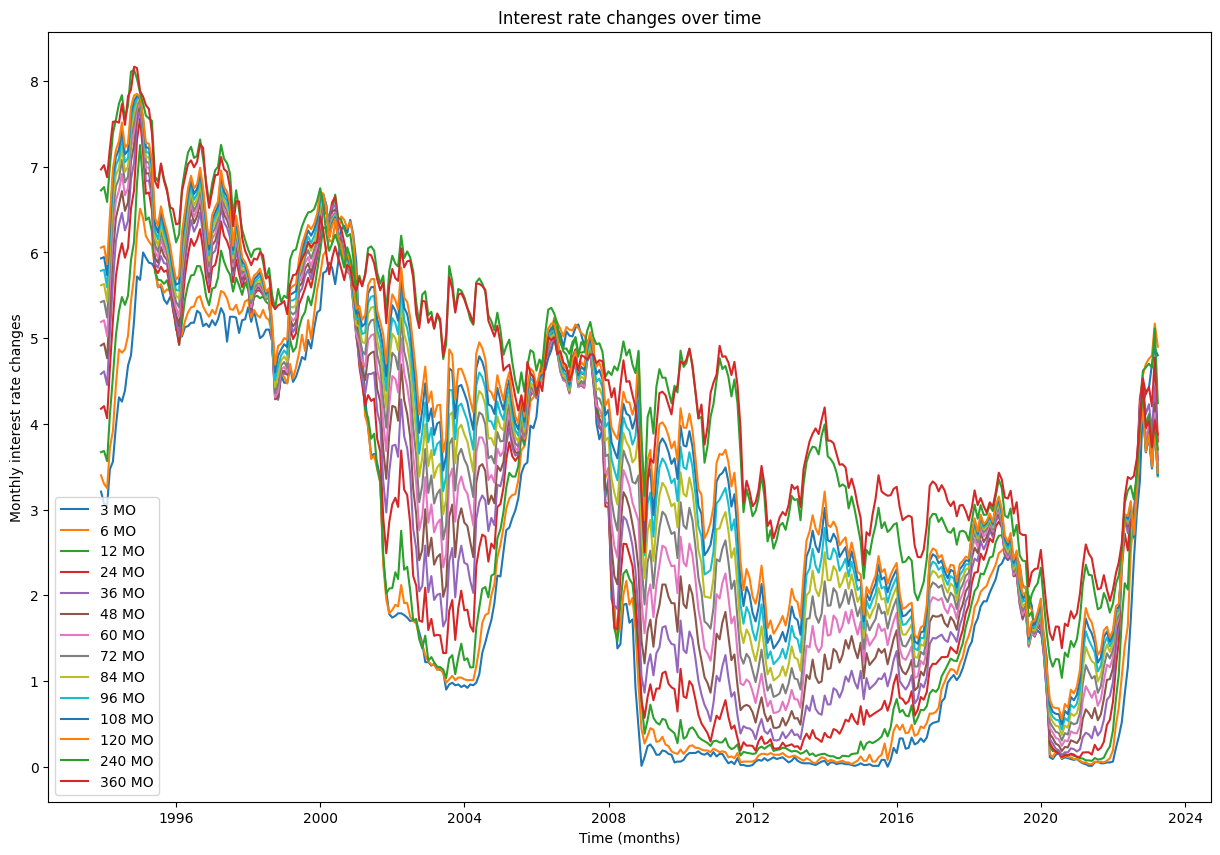

In [68]:
#Time series plot of our historical data 

fig, ax = plt.subplots(figsize=(15, 10))
# Loop over each column of the dataframe and plot it against the index (which is assumed to be time)
for col in df_num.columns:
    ax.plot(df_num.index, df_num[col], label=col)

# Set the x and y axis labels
ax.set_xlabel('Time (months)')
ax.set_ylabel('Monthly interest rate changes')
ax.set_title('Interest rate changes over time')


# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()

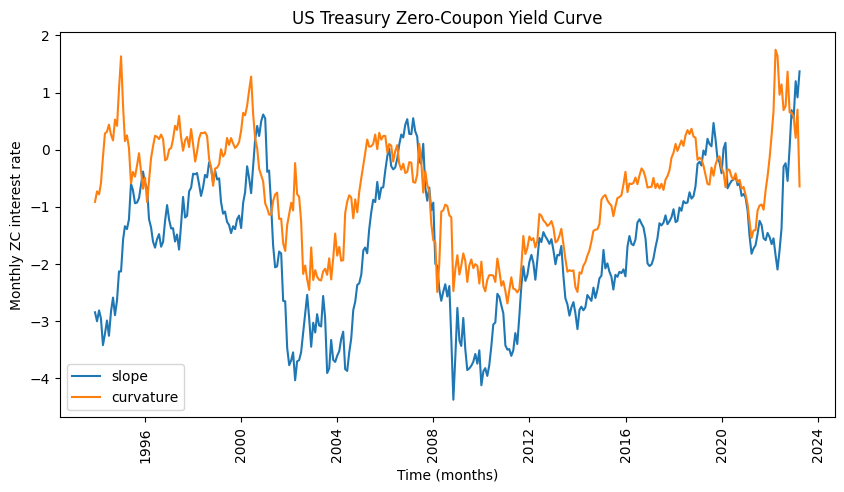

In [69]:
#Slope and Curvature plot

df_num['slope'] = df_num['3 MO'] - df_num['120 MO']
df_num['curvature'] = 2 * df_num['24 MO'] - (df_num['3 MO'] + df_num['120 MO'])



fig, ax = plt.subplots(figsize=(10, 5))
# Loop over each column of the dataframe and plot it against the index (which is assumed to be time)
for col in df_num.iloc[:,-2:].columns:
    ax.plot(df_num.index, df_num[col] , label=col)

# Set the x and y axis labels
ax.set_xlabel('Time (months)')
ax.set_ylabel('Monthly ZC interest rate')
ax.set_title('US Treasury Zero-Coupon Yield Curve')
plt.xticks(rotation=90)


# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()

In [70]:
#Descriptive statistics

stat = df_num.describe()
stat

,3 MO,6 MO,12 MO,24 MO,36 MO,48 MO,60 MO,72 MO,84 MO,96 MO,108 MO,120 MO,240 MO,360 MO,slope,curvature
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,2.301870,2.434108,2.576284,2.770534,2.964335,3.149813,3.323387,3.483183,3.628434,3.759120,3.875692,3.978894,4.481441,4.502935,-1.677024,-0.739696
std,2.135291,2.176484,2.186228,2.149272,2.072677,1.994360,1.926869,1.873223,1.832595,1.802737,1.781132,1.765491,1.683560,1.556230,1.218275,0.939168
min,0.000000,0.030000,0.067800,0.113200,0.136500,0.184100,0.243100,0.306300,0.370100,0.432700,0.493300,0.551700,1.036500,1.383300,-4.375500,-2.690600
25%,0.140000,0.200000,0.389100,0.755100,1.040600,1.373800,1.665300,1.874600,2.086200,2.241400,2.357100,2.432000,2.946000,3.182000,-2.645600,-1.466800
50%,1.710000,1.830000,2.058000,2.316600,2.542100,2.801400,2.933400,3.235200,3.492900,3.729100,3.912100,4.074300,4.662000,4.498600,-1.573600,-0.604200
75%,4.680000,4.830000,4.840800,4.669600,4.643400,4.792600,4.855400,4.896800,5.035900,5.116100,5.280900,5.342800,5.784800,5.697800,-0.728300,0.009800
max,6.380000,6.510000,7.252400,7.563000,7.662600,7.711700,7.741800,7.762800,7.778800,7.797400,7.825200,7.849900,8.130000,8.166900,1.370500,1.749200


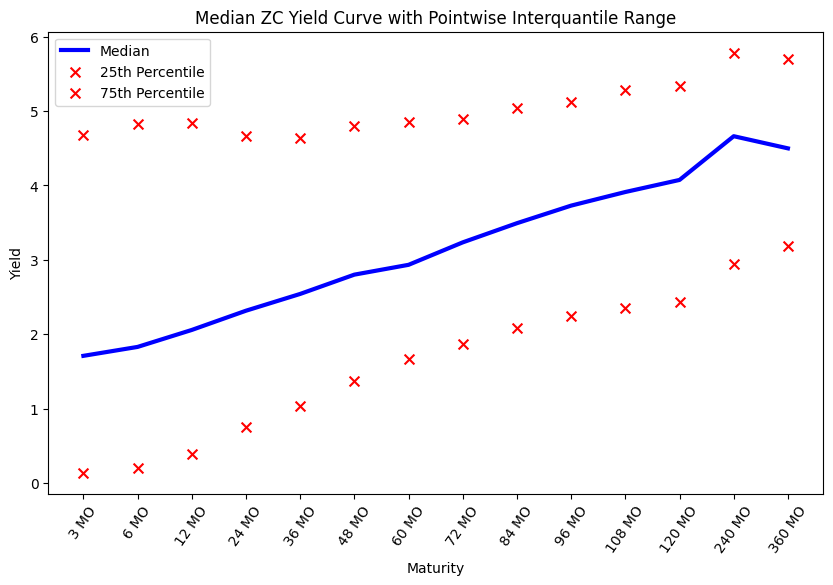

In [71]:
#Median ZC Yield Curve plot with pointwise interquantile range

# Compute the median and interquantile range for each maturity
medians = stat.iloc[5,:-2]
lower = stat.iloc[4,:-2]
upper = stat.iloc[6,:-2]

# Plot the median yield curve with pointwise interquantile range
plt.figure(figsize=(10, 6))
plt.plot(medians.index, medians.values, color='b', lw=3, label='Median')
plt.scatter(lower.index, lower.values , marker='x', color='r', s=50, label='25th Percentile')
plt.scatter(upper.index, upper.values, marker='x', color='r', s=50, label='75th Percentile')
plt.xlabel('Maturity')
plt.ylabel('Yield')
plt.title('Median ZC Yield Curve with Pointwise Interquantile Range')
plt.xticks(rotation=55)
plt.legend()
plt.show()


#Question 1

In [73]:
pca = PCA(n_components=3)
pca_components = pd.DataFrame(pca.fit_transform(df_num.iloc[:,:-2]), index = df_num.index)
pca_components = pca_components.rename(columns={0: "PC1", 1: "PC2", 2: "PC3"})
pca_components

,PC1,PC2,PC3
Date,,,
2023-03-31,1.827947,3.725617,-1.009309
2023-02-28,4.009684,3.664314,-0.225058
2023-01-31,2.323434,3.863550,-0.558103
2022-12-31,3.248815,3.175171,-0.175990
2022-11-30,2.783653,3.367077,-0.247623
...,...,...,...
1994-03-31,9.575544,-2.892089,0.594834
1994-02-28,7.731844,-2.443968,0.087400
1994-01-31,5.749333,-2.266093,-0.094796


In [74]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.93801319 0.05625332 0.00413353]
[131.46553639  32.19448685   8.72705972]


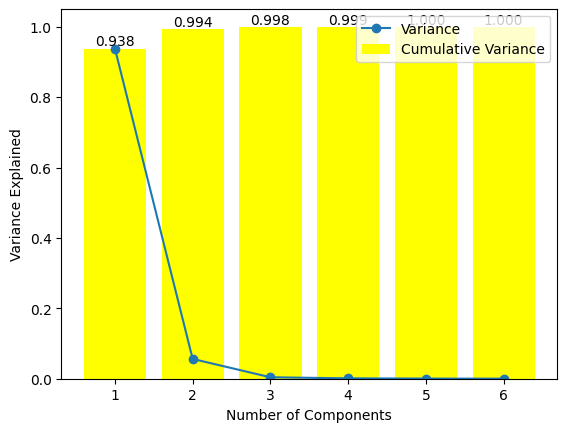

In [76]:
#Plot of the explained varince by the 6 first pricipal components
fig, ax = plt.subplots()

# Perform PCA on the data
pca = PCA()
pca.fit(df_num.iloc[:,:-2])

# Get the variance explained by each component
variance = pca.explained_variance_ratio_

# Calculate the cumulative variance explained by each component
cumulative_variance = np.cumsum(variance[:6])

# Plot the variance vs components
ax.plot(range(1, len(variance[:6])+1), variance[:6], '-o', label='Variance')

bars = ax.bar(range(1, len(variance[:6])+1), cumulative_variance, label='Cumulative Variance', color='yellow')

# Add labels to the top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, '{:.3f}'.format(height), ha='center', va='bottom')

ax.set_xlabel('Number of Components')
ax.set_ylabel('Variance Explained')
ax.legend()
plt.show()

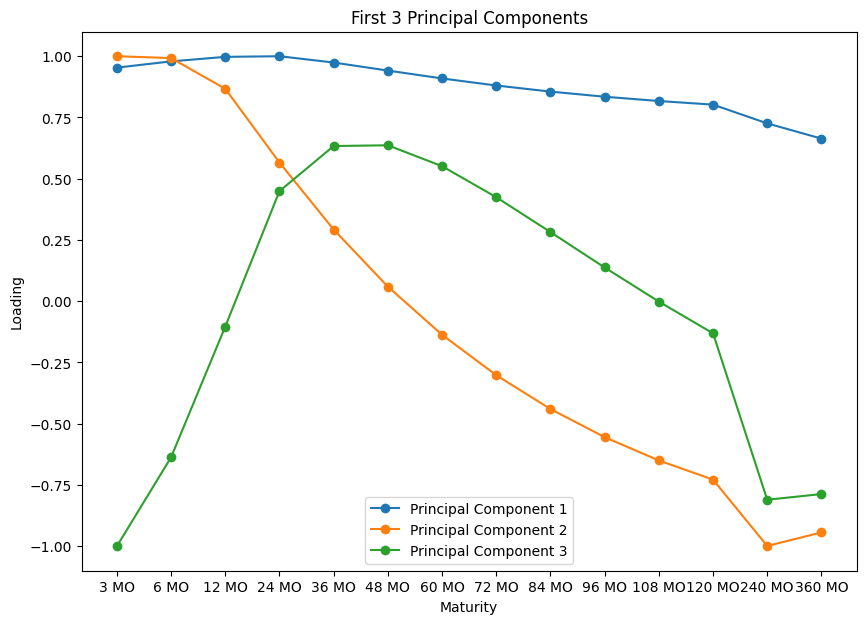

In [80]:
# Ploting the first 3 principal components against the maturity
pca = PCA(n_components=3)
pca.fit(df_num.iloc[:,:-2])
eigenvectors = pca.components_

#Scaled eigenvecttors
scaled_eigenvectors = eigenvectors / np.abs(eigenvectors).max(axis=1, keepdims=True)

# Plot all eigenvectors on the same graph
fig, ax = plt.subplots(figsize=(10, 7))

for i in range(len(eigenvectors)):
    ax.plot(scaled_eigenvectors[i], '-o', label=f'Principal Component {i + 1}')

ax.set_xticks(range(len(df_num.iloc[:,:-2].columns)))
ax.set_xticklabels(df_num.iloc[:,:-2].columns)
ax.set_xlabel('Maturity')
ax.set_ylabel('Loading')
ax.set_title('First 3 Principal Components')
ax.legend()

plt.show()




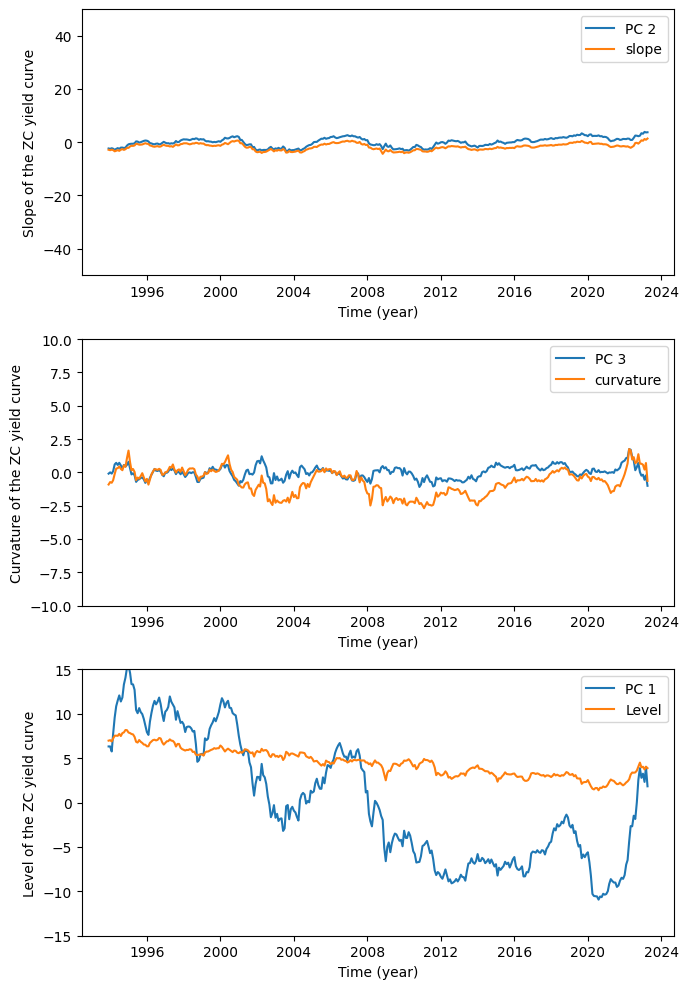

In [82]:
#First three principal components against the empirical evidence

fig, [ax1, ax2, ax3] = plt.subplots(nrows=3, ncols=1, figsize=(7, 10))

# Loop over each column of the dataframe and plot it against the index (which is assumed to be time)

ax1.plot(pca_components.index, pca_components.loc[:,'PC2'], label='PC 2')
ax1.plot(df_num.index, df_num.loc[:,'slope'], label = 'slope')
# Set the x and y axis labels
ax1.set_xlabel('Time (year)')
ax1.set_ylabel('Slope of the ZC yield curve')
ax1.set_ylim([-50, 50])


# Add a legend to the plot
ax1.legend()



# Loop over each column of the dataframe and plot it against the index (which is assumed to be time)

ax2.plot(pca_components.index,  pca_components.loc[:,'PC3'], label='PC 3')
ax2.plot(df_num.index, df_num.loc[:,'curvature'], label = 'curvature')
# Set the x and y axis labels
ax2.set_xlabel('Time (year)')
ax2.set_ylabel('Curvature of the ZC yield curve')
ax2.set_ylim([-10, 10])


# Add a legend to the plot
ax2.legend()

# Loop over each column of the dataframe and plot it against the index (which is assumed to be time)

ax3.plot(pca_components.index,  pca_components.loc[:,'PC1'], label='PC 1')
ax3.plot(df_num.index, df_num.loc[:,'360 MO'], label = 'Level')
# Set the x and y axis labels
ax3.set_xlabel('Time (year)')
ax3.set_ylabel('Level of the ZC yield curve')
ax3.set_ylim([-15, 15])


# Add a legend to the plot
ax3.legend()

# Display the plot
fig.tight_layout()

# Question 2

In [86]:
#The Nelson-Siegel-Svensson Model

params = []
y_fit = []

def nss_function(params, x):
    """
    Nelson-Siegel model function
    """
    beta0, beta1, beta2, beta3, tau1, tau2 = params
    term1 = (1 - np.exp(-x / tau1)) / (x / tau1)
    term2 = (1 - np.exp(-x / tau2)) / (x / tau2)
    term3 = np.exp(-x / tau1)
    term4 = np.exp(-x/tau2)
    return beta0 + beta1 * term1 + beta2 * (term1 - term3)+ beta3 * (term2 - term4)

def nss_error(params, x, y):
    """
    Error function to be minimized
    """
    return np.sum((y - nss_function(params, x))**2)

# Generate sample data
x = np.array([3, 6, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 240, 360])
for i in range(len(df_num)):
  y = np.array(df_num.iloc[i,:-2])
  # Initial parameter values
  beta0 = y.mean()
  beta1 = (y[0] - y[-3]) / x[-1]
  beta2 = -0.1
  beta3 = -0.1
  tau1 = 1
  tau2 = 10

  # Minimize error function to obtain optimal parameter values
  params0 = [beta0, beta1, beta2, beta3, tau1, tau2]
  bounds = [(0, None), (None, None), (None, None),(None, None), (0, None), (0, None)]
  res = minimize(nss_error, params0, args=(x, y), bounds=bounds)
  params.append(res.x)

  # Compute NSS model values for the given maturities
  y_fit.append(np.array(nss_function(params[i], x)))
  


<ipython-input-86-7c9ae23035c9>:11: RuntimeWarning: divide by zero encountered in true_divide
  term1 = (1 - np.exp(-x / tau1)) / (x / tau1)
<ipython-input-86-7c9ae23035c9>:13: RuntimeWarning: divide by zero encountered in true_divide
  term3 = np.exp(-x / tau1)
<ipython-input-86-7c9ae23035c9>:12: RuntimeWarning: divide by zero encountered in true_divide
  term2 = (1 - np.exp(-x / tau2)) / (x / tau2)
<ipython-input-86-7c9ae23035c9>:14: RuntimeWarning: divide by zero encountered in true_divide
  term4 = np.exp(-x/tau2)


In [87]:
# The fitted NSS Values
y_fit = pd.DataFrame(y_fit, columns = df_num.iloc[:,:-2].columns, index = df_num.index)
y_fit

,3 MO,6 MO,12 MO,24 MO,36 MO,48 MO,60 MO,72 MO,84 MO,96 MO,108 MO,120 MO,240 MO,360 MO
Date,,,,,,,,,,,,,,
2023-03-31,4.905281,4.690202,4.334680,3.853557,3.581761,3.439820,3.377120,3.361635,3.373274,3.399578,3.432936,3.468809,3.729014,3.836797
2023-02-28,4.877148,5.174010,5.125983,4.681190,4.413996,4.267947,4.179204,4.119949,4.077616,4.045865,4.021170,4.001415,3.912513,3.882879
2023-01-31,4.707319,4.783572,4.666244,4.217800,3.888962,3.693636,3.583468,3.524876,3.497855,3.490343,3.494830,3.506523,3.672544,3.763363
2022-12-31,4.433500,4.721141,4.751056,4.426946,4.194579,4.056661,3.973555,3.923918,3.896021,3.882722,3.879347,3.882702,4.007698,4.098320
2022-11-30,4.453803,4.581736,4.647984,4.431759,4.133273,3.907578,3.772247,3.706531,3.685732,3.690727,3.708895,3.732653,3.910691,3.978878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994-03-31,3.559399,3.922371,4.546441,5.220741,5.647783,5.989016,6.263049,6.479762,6.650478,6.785771,6.894257,6.982492,7.385632,7.520409
1994-02-28,3.474098,3.713178,4.101172,4.652590,5.045093,5.354513,5.611077,5.828182,6.013161,6.171116,6.306196,6.421963,7.007260,7.212312
1994-01-31,3.057864,3.241024,3.562442,4.070570,4.457588,4.766683,5.022667,5.240168,5.428161,5.592462,5.737090,5.865016,6.591718,6.875767


In [88]:
#The parameters dataframe
params = pd.DataFrame(params, index = df_num.index)
params = params.rename(columns={0: "beta0", 1: "beta1", 2: "beta2", 3: "beta3", 4: "tau1", 5:"tau2"})


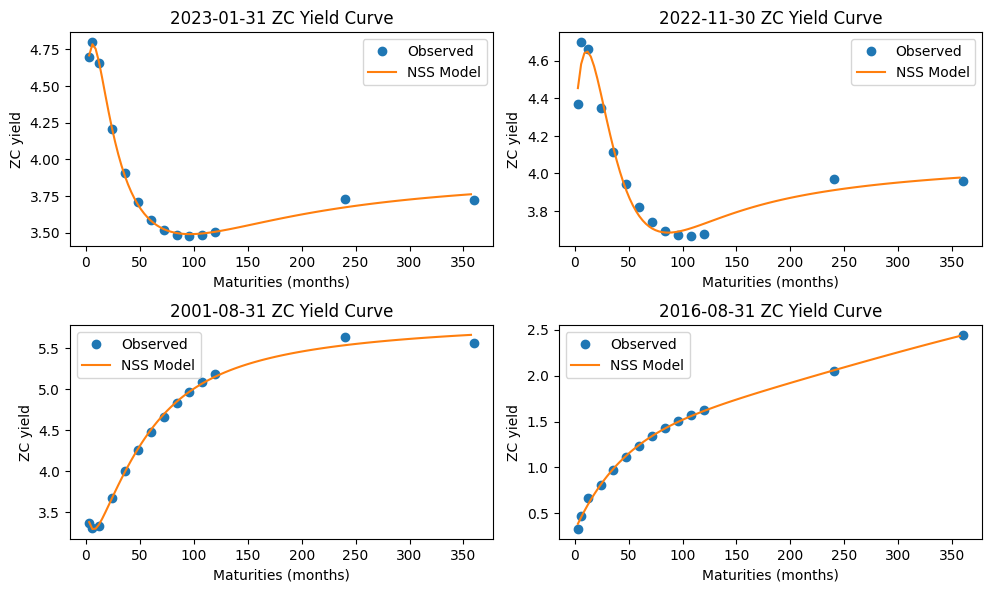

In [90]:
#The ZC yield curves in 4 different dates using the NSS model

maturities = np.array([3, 6, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 240, 360])
plt.figure(figsize=(10,6))
plt.subplot(2, 2, 1)
observed = np.array(df_num.loc['2023-01-31',:'360 MO'])
x = np.arange(3,360, 3)
y = nss_function(params.loc['2023-01-31',:], x)
#Plot results
plt.plot(maturities, observed, 'o', label='Observed')
plt.plot(x, y, label='NSS Model')
plt.title('2023-01-31 ZC Yield Curve')
plt.ylabel('ZC yield')
plt.xlabel('Maturities (months)')
plt.legend()



plt.subplot(2, 2, 2)
observed = np.array(df_num.loc['2022-11-30',:'360 MO'])
x = np.arange(3,360, 3)
y = nss_function(params.loc['2022-11-30',:], x)

plt.plot(maturities, observed, 'o', label='Observed')
plt.plot(x, y, label='NSS Model')
plt.xlabel('maturity(months)')
plt.title('2022-11-30 ZC Yield Curve')
plt.ylabel('ZC yield')
plt.xlabel('Maturities (months)')
plt.legend()





plt.subplot(2, 2, 3)
observed = np.array(df_num.loc['2001-08-31',:'360 MO'])
x = np.arange(3,360, 3)
y = nss_function(params.loc['2001-08-31',:], x)
#Plot results

plt.plot(maturities, observed, 'o', label='Observed')
plt.plot(x, y, label='NSS Model')
plt.title('2001-08-31 ZC Yield Curve')
plt.ylabel('ZC yield')
plt.xlabel('Maturities (months)')
plt.legend()



plt.subplot(2, 2, 4)
observed = np.array(df_num.loc['2016-08-31',:'360 MO'])
x = np.arange(3,360, 3)
y = nss_function(params.loc['2016-08-31',:], x)
#Plot results

plt.plot(maturities, observed, 'o', label='Observed')
plt.plot(x, y, label='NSS Model')
plt.title('2016-08-31 ZC Yield Curve')
plt.ylabel('ZC yield')
plt.xlabel('Maturities (months)')
plt.legend()
plt.tight_layout(pad=1)
plt.show()


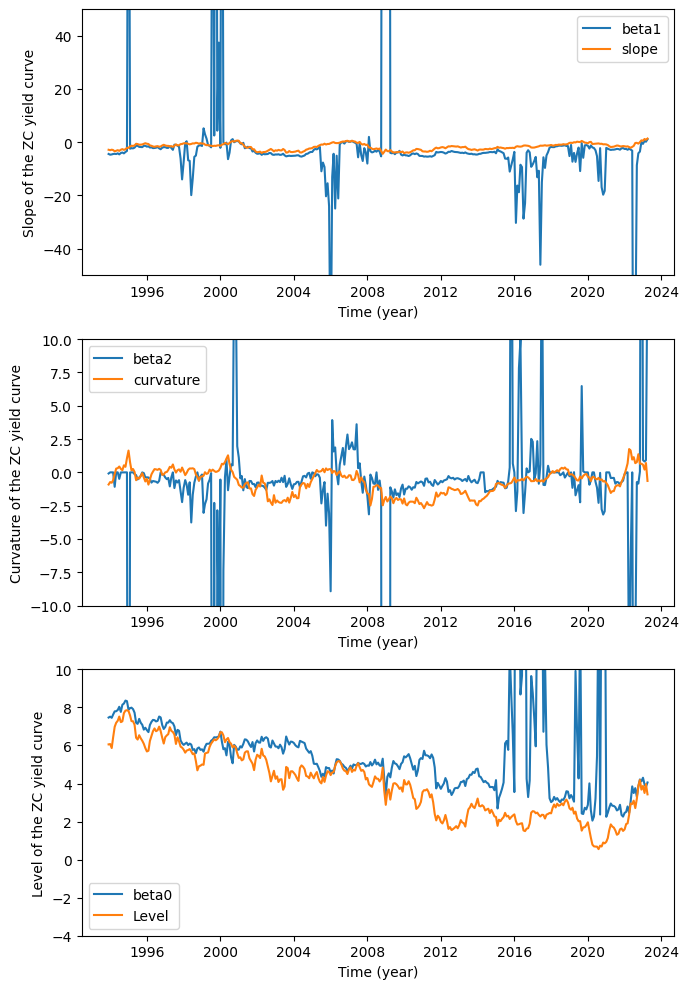

In [91]:
#Ploting the factors against the empirical evidence
fig, [ax1, ax2, ax3] = plt.subplots(nrows=3, ncols=1, figsize=(7, 10))

# Loop over each column of the dataframe and plot it against the index (which is assumed to be time)

ax1.plot(params.index,  params.loc[:,'beta1'], label='beta1')
ax1.plot(df_num.index, df_num.loc[:,'slope'], label = 'slope')
# Set the x and y axis labels
ax1.set_xlabel('Time (year)')
ax1.set_ylabel('Slope of the ZC yield curve')
ax1.set_ylim([-50, 50])


# Add a legend to the plot
ax1.legend()



# Loop over each column of the dataframe and plot it against the index (which is assumed to be time)

ax2.plot(params.index, 0.3* params.loc[:,'beta2'], label='beta2')
ax2.plot(df_num.index,  df_num.loc[:,'curvature'], label = 'curvature')
# Set the x and y axis labels
ax2.set_xlabel('Time (year)')
ax2.set_ylabel('Curvature of the ZC yield curve')
ax2.set_ylim([-10, 10])


# Add a legend to the plot
ax2.legend()

# Loop over each column of the dataframe and plot it against the index (which is assumed to be time)

ax3.plot(params.index,  params.loc[:,'beta0'], label='beta0')
ax3.plot(df_num.index, df_num.loc[:,'120 MO'], label = 'Level')
# Set the x and y axis labels
ax3.set_xlabel('Time (year)')
ax3.set_ylabel('Level of the ZC yield curve')
ax3.set_ylim([-4, 10])


# Add a legend to the plot
ax3.legend()

# Display the plot
fig.tight_layout()

##Simulating Interest Rates in the future

In [92]:
#Simulating Interest Rates 
# Define simulation parameters
n_simulations = 10000
n_months = 12
dt = 1/12

# Define mean interest rates and covariance matrix
mean_rates = df_num.iloc[:,:-2].mean(axis=0)
cov_matrix = np.cov(df_num.iloc[:,:-2], rowvar=False)

# Generate random normal variables for each time step in each simulation
cholesky_decomp = np.linalg.cholesky(cov_matrix)
random_vars = np.random.normal(size=(n_simulations, n_months, cov_matrix.shape[0]))
correlated_random_vars = np.einsum('ijk,lk->ijl', random_vars, cholesky_decomp)

# Calculate the simulated interest rates for each time step and each simulation
simulated_rates = np.zeros((n_simulations, n_months, cov_matrix.shape[0]))
for i in range(n_simulations):
    for j in range(n_months):
        if j == 0:
            simulated_rates[i, j] = mean_rates
        else:
            simulated_rates[i, j] = simulated_rates[i, j-1] + \
                                     (mean_rates * dt) + \
                                     (correlated_random_vars[i, j] * np.sqrt(dt))
last_data_points = simulated_rates[-1, :, :]
#average_data_points = np.mean(simulated_rates, axis=0)
# Convert the simulated rates to a pandas DataFrame
simulated_rates_df = pd.DataFrame(last_data_points, columns=df_num.iloc[:,:-2].columns)



In [94]:
#The database containing the simulations in one year  
lastmonthsimulations = pd.DataFrame(simulated_rates[:, 11,:], columns = df_num.iloc[:,:-2].columns)
lastmonthsimulations.head(10)

,3 MO,6 MO,12 MO,24 MO,36 MO,48 MO,60 MO,72 MO,84 MO,96 MO,108 MO,120 MO,240 MO,360 MO
0,7.260880,7.520783,7.674556,7.782753,7.816542,7.827248,7.842062,7.869389,7.909418,7.959786,8.017163,8.078526,8.536819,8.488114
1,6.042452,6.300665,6.686682,7.346327,7.902475,8.392707,8.837740,9.244961,9.616429,9.952782,10.254135,10.521241,11.663426,11.263132
2,2.516721,2.804969,3.230774,3.642366,4.095049,4.556404,4.990403,5.382576,5.729827,6.033951,6.298782,6.528648,7.702704,8.084945
3,5.721366,5.765234,5.882131,6.062131,6.267190,6.482214,6.699907,6.914580,7.122010,7.319482,7.505332,7.678793,8.741409,8.889901
4,7.508318,7.627588,7.869214,7.954472,7.962338,7.946792,7.925534,7.906189,7.892395,7.885679,7.886410,7.894349,8.180545,8.445228
5,4.306840,4.782432,5.209265,5.749245,6.181095,6.546800,6.867459,7.152684,7.407576,7.635482,7.839090,8.021056,9.079431,9.490859
6,6.390593,6.553127,6.665547,6.765532,6.836015,6.927623,7.047727,7.191183,7.349811,7.515407,7.681294,7.842512,8.830892,8.880869
7,4.642589,4.849346,5.027839,5.471447,5.844719,6.152053,6.416190,6.651681,6.866662,7.065629,7.250680,7.422847,8.519940,8.806625
8,1.273613,1.731772,2.131409,2.589176,3.151325,3.744121,4.318696,4.848115,5.320286,5.732449,6.086848,6.388104,7.614428,7.666465
9,7.215228,7.659341,7.935430,8.090379,8.169258,8.239158,8.319658,8.410353,8.506123,8.601921,8.693884,8.779486,9.190364,9.105425


In [95]:
# Fitting Nelson Svensson Model for every simulations
params_simulated = []
y_fit_simulated = []
x = np.array([3, 6, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 240, 360])
for i in range(len(lastmonthsimulations)):
  y = np.array(lastmonthsimulations.iloc[i,:])
  # Initial parameter values
  beta0 = y.mean()
  beta1 = (y[0] - y[-1]) / x[-1]
  beta2 = -0.1
  beta3 = -0.1
  tau1 = 1
  tau2 = 10

  # Minimize error function to obtain optimal parameter values
  params0 = [beta0, beta1, beta2, beta3, tau1, tau2]
  bounds = [(0, None), (None, None), (None, None),(None, None), (0, None), (0, None)]
  res = minimize(nss_error, params0, args=(x, y), bounds=bounds)
  params_simulated.append(res.x)

  # Compute NSS model values for the given maturities
  y_fit_simulated.append(np.array(nss_function(params_simulated[i], x)))
  


<ipython-input-86-7c9ae23035c9>:11: RuntimeWarning: divide by zero encountered in true_divide
  term1 = (1 - np.exp(-x / tau1)) / (x / tau1)
<ipython-input-86-7c9ae23035c9>:13: RuntimeWarning: divide by zero encountered in true_divide
  term3 = np.exp(-x / tau1)
<ipython-input-86-7c9ae23035c9>:12: RuntimeWarning: divide by zero encountered in true_divide
  term2 = (1 - np.exp(-x / tau2)) / (x / tau2)
<ipython-input-86-7c9ae23035c9>:14: RuntimeWarning: divide by zero encountered in true_divide
  term4 = np.exp(-x/tau2)


In [96]:
#The parameters from the simulated data 
params_simulated = pd.DataFrame(params_simulated, columns = params.columns)
average_params = pd.DataFrame(params_simulated, columns = params.columns).mean()
average_lastmonthsimulations = lastmonthsimulations.mean()


In [98]:
 #The NSS fit for the one year average interest rate
x = np.array([3, 6, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 240, 360])
y = average_lastmonthsimulations
beta0 = y.mean()
beta1 = (y[0] - y[-1]) / x[-1]
beta2 = -0.1
beta3 = -0.1
tau1 = 1
tau2 = 10
params0 = [beta0, beta1, beta2, beta3, tau1, tau2]
bounds = [(0, None), (None, None), (None, None),(None, None), (0, None), (0, None)]
res = minimize(nss_error, params0, args=(x, y), bounds=bounds)
params_simulated_average =(res.x)

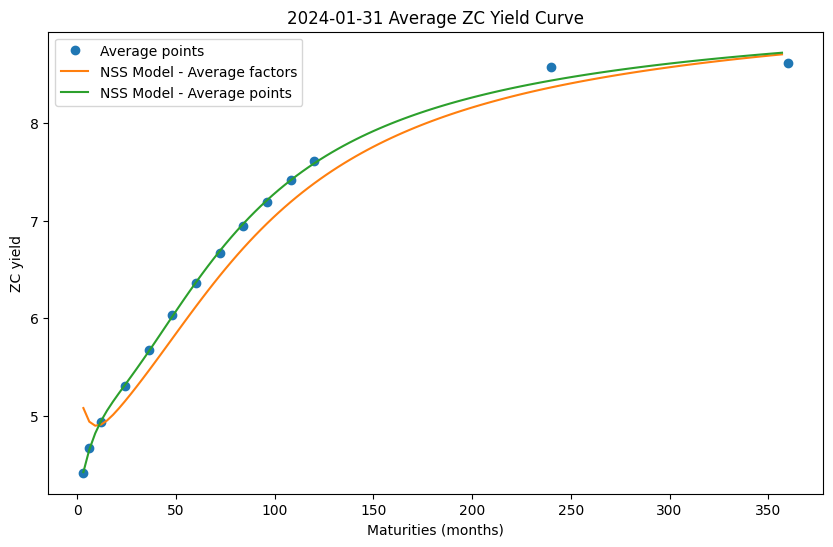

In [100]:
#Plot of the average ZC yield Curve in one year

maturities = np.array([3, 6, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 240, 360])
plt.figure(figsize=(10,6))
observed = average_lastmonthsimulations
x = np.arange(3,360, 3)
y = nss_function(average_params, x)
y_average = nss_function(params_simulated_average, x)
#Plot results
plt.plot(maturities, observed, 'o', label='Average points')
plt.plot(x, y, label='NSS Model - Average factors')
plt.plot(x, y_average, label='NSS Model - Average points')
#plt.plot(x, nss_function(params.iloc[0,:], x), label = 'NSS model - 2023-01-31')
plt.title('2024-01-31 Average ZC Yield Curve')
plt.ylabel('ZC yield')
plt.xlabel('Maturities (months)')
plt.legend()


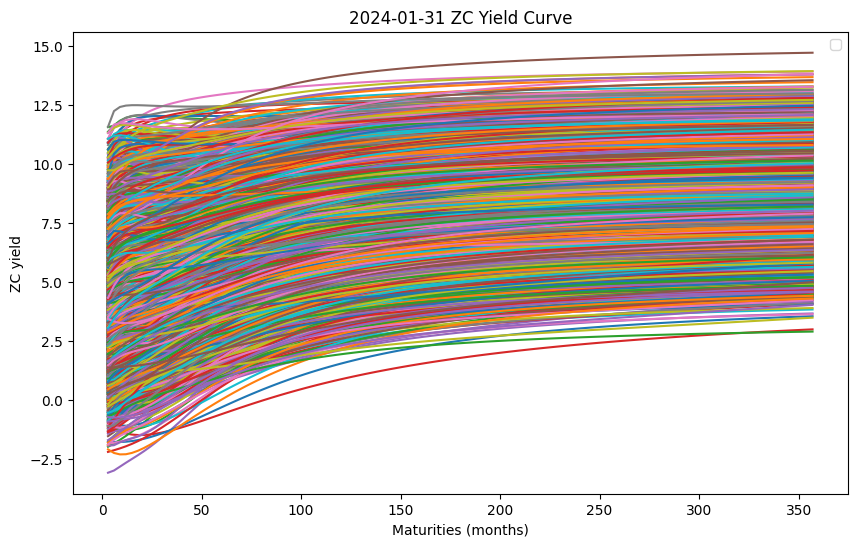

In [102]:
#Plot of the 10000 simulated future yield curves

maturities = np.array([3, 6, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 240, 360])
plt.figure(figsize=(10,6))
x = np.arange(3,360, 3)

#Plot results
for i in range(n_simulations):
  plt.plot(x, nss_function(params_simulated.iloc[i,:], x))
plt.title('2024-01-31 ZC Yield Curve')
plt.ylabel('ZC yield')
plt.xlabel('Maturities (months)')
plt.legend()


#Question 3

In [103]:
def present_value(future_value, discount_rate_schedule, time_periods, coupon=0):
    """
    Calculates the present value of a future amount based on a schedule of discount rates, time periods, and coupon payments.
    """
    present_value = 0
    for t in range(1, time_periods + 1):
        if t == time_periods:
            coupon += future_value
        discount_rate = discount_rate_schedule[t-1]
        present_value += coupon / ((1 + discount_rate) ** t)
    return present_value


In [105]:
r_list=[-0.001361838, -0.00192416, -0.001034311, 0.000313587,0.001694032, 0.002952019, 0.004053898, 0.005014824, 0.005864976, 0.006634972, 0.007350479, 0.008030989, 0.008690314, 0.009337643, 0.00997865]
face=[100,200,400,500,420,280,210,150,110,70]
coupons_per=[4.0, 3.2, 2.8, 2.1, 1.7, 1.5, 1.4, 1.3, 1.8, 1.6]
coupons= [a*b/100 for a,b in zip(face,coupons_per)]
t=[1,2,4,5,7,8,10,12,14,15]
spread = [0.0017,0.0023,.0026,0.0024,0.004,0.005,0.007,0.008,0.011,0.01]
# Combine all the lists into a single DataFrame
#asset_data = pd.DataFrame({'Face Value': face, 'Coupon Rate': coupons_per, 'Coupon Amount': coupons, 'Time to Maturity': t, 'Spread': spread})
liabi=[122.0,146.4,146.4,170.8,195.2,219.6,244.0,268.4,244,219.6,170.8,146.4,73.2,48.8,24.4]
liabilities_cf = pd.Series(liabi, name="Liabilities Cash Flows")


In [106]:
#Present Value for the bonds
pv = [present_value(face[i], r_list+spread, t[i], coupons[i]) for i in range(len(face))]
print(pv)
asset0=sum(pv) + 170
print("Total Present Value of Assets: ")
asset0

[104.1418242937125, 213.60531931353648, 444.37794036387584, 548.2722028787731, 457.91831631788006, 302.2547869889138, 225.37001986276695, 158.94946262541714, 123.11360739430305, 76.28815301591851]
Total Present Value of Assets: 


2824.2916330550975

In [107]:
# The present value of each liability cash flow
liabilities_pv = [cf / (1 + r)**t for cf, r, t in zip(liabi, r_list, np.arange(0,15,1)+1)]

# Save the present value of each liability cash flow in a list
liabilities_pv_list = []

for i, pv in enumerate(liabilities_pv):
    print(f"Present value of liability {i + 1}: {pv:.2f}")
    liabilities_pv_list.append(pv)

print("All present values in a list:")
print(liabilities_pv_list)
liab0=sum(liabilities_pv_list)
print("Total Present Value of Liabilities: ")
liab0



Present value of liability 1: 122.17
Present value of liability 2: 146.97
Present value of liability 3: 146.86
Present value of liability 4: 170.59
Present value of liability 5: 193.55
Present value of liability 6: 215.75
Present value of liability 7: 237.19
Present value of liability 8: 257.87
Present value of liability 9: 231.49
Present value of liability 10: 205.55
Present value of liability 11: 157.58
Present value of liability 12: 133.00
Present value of liability 13: 65.41
Present value of liability 14: 42.85
Present value of liability 15: 21.02
All present values in a list:
[122.16637080608582, 146.96502432030525, 146.85521072529696, 170.58592521558376, 193.55499427848937, 215.75029289889625, 237.18686814146054, 257.87115781954986, 231.49022070506064, 205.5474967746144, 157.5800726136935, 133.00086802990796, 65.41224043113854, 42.84589661622134, 21.023592343519393]
Total Present Value of Liabilities: 


2347.836231719823

In [110]:
sh_eq0=asset0-liab0
print("Total Shareholder\'s equity in dollars")

print(sh_eq0)

Total Shareholder's equity in dollars
476.4554013352745


#Question 4

In [114]:
y_fit_simulated_lastmonthsimulated = []
x = np.arange(0,360, 12)

for i in range(n_simulations):
  y_fit_simulated_lastmonthsimulated.append(np.array(nss_function(params_simulated.iloc[i,:], x)))

y_fit_simulated_lastmonthsimulated = pd.DataFrame(y_fit_simulated_lastmonthsimulated, columns = x)


<ipython-input-86-7c9ae23035c9>:11: RuntimeWarning: invalid value encountered in true_divide
  term1 = (1 - np.exp(-x / tau1)) / (x / tau1)
<ipython-input-86-7c9ae23035c9>:12: RuntimeWarning: invalid value encountered in true_divide
  term2 = (1 - np.exp(-x / tau2)) / (x / tau2)


In [115]:
#Present Value for the bonds in one year time using the simulated rates
asset1year = []
face_1year=[200,400,500,420,280,210,150,110,70]
coupons_per_1year=[ 3.2, 2.8, 2.1, 1.7, 1.5, 1.4, 1.3, 1.8, 1.6]
coupons_1year= [a*b/100 for a,b in zip(face_1year,coupons_per_1year)]
spread = [0.005,0.005,.005,0.005,0.005,0.005,0.005,0.005,0.005]
t_1year=[1,3,4,6,7,9,11,13,14]
for j in range(n_simulations):
  r_list = (np.array(y_fit_simulated_lastmonthsimulated.iloc[j,1:15]/100).tolist())
  pv = [present_value(face_1year[i], r_list+spread, t_1year[i], coupons_1year[i]) for i in range(len(face_1year))]
  asset1year.append(sum(pv)+ 104 + 170*(1+ 0.0028))

#asset1year

In [116]:

liab1year = []
for j in range(n_simulations):
  r_list = (np.array(y_fit_simulated_lastmonthsimulated.iloc[j,1:15]/100).tolist())
  liabilities_pv_1year = [cf / (1 + r)**t for cf, r, t in zip(liabi[1:], r_list, np.arange(0,14,1)+1)]

  liab1year.append(sum(liabilities_pv_1year)+liabi[0])

#liab1year



In [119]:
sh_eq1yar=pd.DataFrame(asset1year)-pd.DataFrame(liab1year) 
difference = pd.DataFrame(asset1year)-pd.DataFrame(liab1year)- sh_eq0 
print("Total Shareholder\'s equity in dollars in one year time for each simulation is:")
print(sh_eq1yar)


Total Shareholder's equity in dollars in one year time for each simulation is:
               0
0     430.925445
1     446.773753
2     454.243393
3     441.425207
4     427.847974
...          ...
9995  439.079427
9996  454.286557
9997  446.156348
9998  446.287042
9999  457.159470

[10000 rows x 1 columns]


Text(0.5, 0, "Shareholders's equity in dollars")

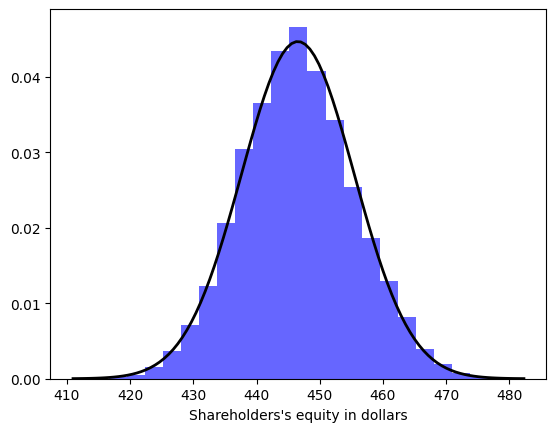

In [124]:
#Distribution of Shareholder's equity in one year time
plt.hist(sh_eq1yar, bins=25, density=True, alpha=0.6, color='b')

x = np.linspace(sh_eq1yar.min(), sh_eq1yar.max(), 100)
p = norm.pdf(x, sh_eq1yar.mean(), sh_eq1yar.std())
  
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Shareholders\'s equity in dollars')

<ipython-input-125-052e549d5ef0>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color = 'r')


Text(0.5, 0, 'The difference between future and present value in dollars')

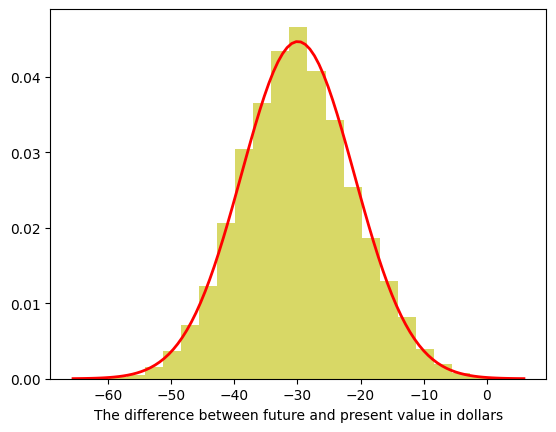

In [125]:
#The difference distribution between future and present value in dollars
plt.hist(difference, bins=25, density=True, alpha=0.6, color='y')

x = np.linspace(difference.min(), difference.max(), 100)
p = norm.pdf(x, difference.mean(), difference.std())
  
plt.plot(x, p, 'k', linewidth=2, color = 'r')
plt.xlabel('The difference between future and present value in dollars')


In [127]:
#Finding the loss with probability 1/200 
import scipy.stats as st
st.norm.ppf(1/200)
print('The loss with probability 1/200 is:')
difference.mean() + difference.std()*st.norm.ppf(1/200)

The loss with probability 1/200 is:


0   -52.893604
dtype: float64

# Question 5


In [129]:
#The put strike
strike = [196.23, 367.56, 433.21, 317, 199, 132, 80.5, 56.9, 33.25]

In [130]:
def put_payoff(spot_price, strike_price):
    return max(strike_price - spot_price, 0)

In [131]:
#For each dataset we are gonna calculate the payoff of puts
payoff_1year = []
face_1year=[200,400,500,420,280,210,150,110,70]
coupons_per_1year=[ 3.2, 2.8, 2.1, 1.7, 1.5, 1.4, 1.3, 1.8, 1.6]
coupons_1year= [a*b/100 for a,b in zip(face_1year,coupons_per_1year)]
spread = [0.005,0.005,.005,0.005,0.005,0.005,0.005,0.005,0.005]
t_1year=[1,3,4,6,7,9,11,13,14]
strike = [196.23, 367.56, 433.21, 317, 199, 132, 80.5, 56.9, 33.25]
for j in range(n_simulations):
  r_list = (np.array(y_fit_simulated_lastmonthsimulated.iloc[j,1:15]/100).tolist())
  pv = [present_value(face_1year[i], r_list+spread, t_1year[i], coupons_1year[i]) for i in range(len(face_1year))]
  payoff=[put_payoff(pv[k], strike[k]) for k in range(len(pv))]
  payoff_1year.append(sum(payoff))



<ipython-input-134-97656c86bf52>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color = 'r')


Text(0.5, 0, " Shareholder's equity distribution in dollars")

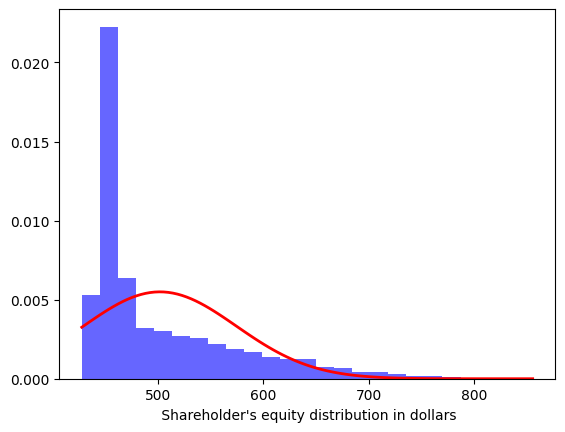

In [134]:
# The distribution of shareholder's Equity in one year 
new_values = pd.DataFrame(payoff_1year) + sh_eq1yar 
plt.hist(new_values, bins=25, density=True, alpha=0.6, color='b')

x = np.linspace(new_values.min(), new_values.max(), 100)
p = norm.pdf(x, new_values.mean(), new_values.std())
  
plt.plot(x, p, 'k', linewidth=2, color = 'r')
plt.xlabel(' Shareholder\'s equity distribution in dollars')


<ipython-input-138-8ce38acea472>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color = 'r')


Text(0.5, 0, "Difference Shareholder's equity distribution in dollars")

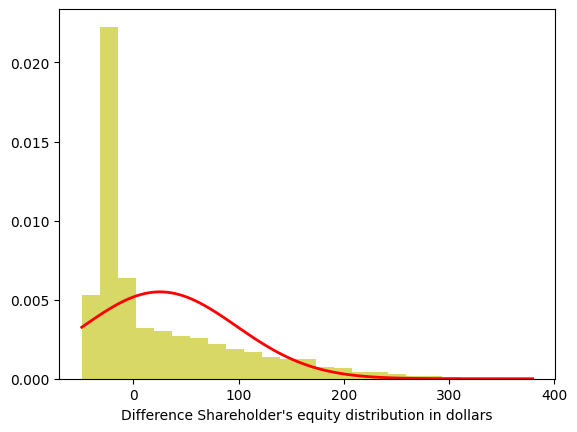

In [138]:
# The distribution of  difference in shareholder's Equity in one year 
new_values = pd.DataFrame(difference) + pd.DataFrame(payoff_1year)
plt.hist(new_values, bins=25, density=True, alpha=0.6, color='y')

x = np.linspace(new_values.min(), new_values.max(), 100)
p = norm.pdf(x, new_values.mean(), new_values.std())
  
plt.plot(x, p, 'k', linewidth=2, color = 'r')
plt.xlabel('Difference Shareholder\'s equity distribution in dollars')


## Duration and Convexity

In [155]:
def bond_duration(coupon_rate, spot_rates, years_to_maturity, face_value):
    """Calculate the duration of a bond using a set of spot rates."""
    # Calculate the present value of each cash flow
    cash_flows = [coupon_rate * face_value]
    for i in range(1, years_to_maturity):
        cash_flows.append(coupon_rate * face_value)
    cash_flows[-1] += face_value  # add the final principal payment
    present_values = [cf / (1 + sr)**t for t, (sr, cf) in enumerate(zip(spot_rates, cash_flows), start=1)]
    
    # Calculate the weighted time of each cash flow
    weighted_times = [t * pv / sum(present_values) for t, pv in enumerate(present_values, start=1)]
    
    # Calculate the duration
    duration = sum(weighted_times)
    
    return duration



In [156]:
r_list=[-0.001361838, -0.00192416, -0.001034311, 0.000313587,0.001694032, 0.002952019, 0.004053898, 0.005014824, 0.005864976, 0.006634972, 0.007350479, 0.008030989, 0.008690314, 0.009337643, 0.00997865]
face=[100,200,400,500,420,280,210,150,110,70]
coupons_per=[4.0, 3.2, 2.8, 2.1, 1.7, 1.5, 1.4, 1.3, 1.8, 1.6]
coupons= [a*b/100 for a,b in zip(face,coupons_per)]
t=[1,2,4,5,7,8,10,12,14,15]
spread = [0.0017,0.0023,.0026,0.0024,0.004,0.005,0.007,0.008,0.011,0.01]
liabi=[122.0,146.4,146.4,170.8,195.2,219.6,244.0,268.4,244,219.6,170.8,146.4,73.2,48.8,24.4]


In [157]:
durs=[]
for i in range(len(face)):
  duration = bond_duration(coupon_rate=coupons[i], spot_rates=r_list, years_to_maturity=t[i], face_value=face[i])
  durs.append(duration)
  print(f"Duration of the bond {i+1}:", duration)

Duration of the bond 1: 1.0
Duration of the bond 2: 1.5368508753861345
Duration of the bond 3: 2.531604511348963
Duration of the bond 4: 3.0322351069006914
Duration of the bond 5: 4.0375577926806905
Duration of the bond 6: 4.566878036742338
Duration of the bond 7: 5.578601479138561
Duration of the bond 8: 6.605370479829823
Duration of the bond 9: 7.542358809405453
Duration of the bond 10: 8.160984400444265


In [158]:
def portfolio_duration(durations, weights):
    """Calculate the total duration of a portfolio of bonds."""
    # Calculate the weighted average of the individual bond durations
    total_duration = sum(d * w for d, w in zip(durations, weights))
    
    return total_duration

durations = durs
weights = 0.1*np.ones(10)

total_duration = portfolio_duration(durations, weights)
print("Total duration of the portfolio:", total_duration)


Total duration of the portfolio: 4.459244149187692


In [159]:
def bond_convexity(coupon_rate, spot_rates, years_to_maturity, face_value):
    """Calculate the convexity of a bond using a set of spot rates."""
    # Calculate the present value of each cash flow
    cash_flows = [coupon_rate * face_value]
    for i in range(1, years_to_maturity):
        cash_flows.append(coupon_rate * face_value)
    cash_flows[-1] += face_value  # add the final principal payment
    present_values = [cf / (1 + sr)**t for t, (sr, cf) in enumerate(zip(spot_rates, cash_flows), start=1)]
    
    # Calculate the convexity
    convexity = 0
    for t, pv in enumerate(present_values, start=1):
        convexity += (t * (t + 1) * cash_flows[t-1]) / (pv * sum(present_values))
    
    # Adjust for face value
    convexity /= face_value
    
    # Adjust for compounding
    convexity /= (1 + sum(spot_rates))**2
    
    return convexity
convx=[]
for i in range(len(face)):
  convexity = bond_convexity(coupon_rate=coupons[i], spot_rates=r_list, years_to_maturity=t[i], face_value=face[i])
  convx.append(convexity)
  print(f"Convexity of the bond {i+1}:", convexity)

Convexity of the bond 1: 3.513104627734099e-05
Convexity of the bond 2: 1.2687948589268222e-05
Convexity of the bond 3: 4.7944458930233406e-06
Convexity of the bond 4: 4.6253765589874385e-06
Convexity of the bond 5: 1.682393304800685e-05
Convexity of the bond 6: 8.064126955530884e-05
Convexity of the bond 7: 0.00030742779103590327
Convexity of the bond 8: 0.0012822489133956793
Convexity of the bond 9: 0.003227351811554959
Convexity of the bond 10: 0.015949603821821437


In [150]:
def liability_convexity(yield_curve, cash_flows):
    """Calculate the convexity of a liability stream with multiple cash flows."""
    # Calculate the present value of the liability stream
    present_values = [cf / (1 + r)**t for t, (r, cf) in enumerate(zip(yield_curve, cash_flows), start=1)]
    liability_value = sum(present_values)
    
    # Calculate the convexity of each cash flow
    convexities = []
    for t, pv in enumerate(present_values, start=1):
        cash_flow = cash_flows[t-1]
        convexity = (cash_flow * t**2) / (pv * liability_value)
        convexities.append(convexity)
    
    # Sum the convexities to get the total convexity of the liability stream
    total_convexity = sum(convexities)
    
    # Adjust for compounding
    total_convexity /= (1 + sum(yield_curve))**2
    
    return total_convexity
convx_l=[]
for i in range(len(face)):
  convexity = liability_convexity(r_list, liabi)
  convx_l.append(convexity)
  print(f"Convexity of the cash flow {i+1}:", convexity)


Convexity of the cash flow 1: 0.5117173653526844
Convexity of the cash flow 2: 0.5117173653526844
Convexity of the cash flow 3: 0.5117173653526844
Convexity of the cash flow 4: 0.5117173653526844
Convexity of the cash flow 5: 0.5117173653526844
Convexity of the cash flow 6: 0.5117173653526844
Convexity of the cash flow 7: 0.5117173653526844
Convexity of the cash flow 8: 0.5117173653526844
Convexity of the cash flow 9: 0.5117173653526844
Convexity of the cash flow 10: 0.5117173653526844
